In [3]:
import pandas as pd

# 'country_vaccinations.csv' ist der Name der Datei
df = pd.read_csv(r"C:\Users\monaa\Desktop\Seminare & Vorlesungen\Projektmanagement ILV\movies.csv")

df.head() 

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [26]:
import pandas as pd

df = pd.read_csv(r"C:\Users\monaa\Desktop\Seminare & Vorlesungen\Projektmanagement ILV\movies.csv")

# 'str.split', um die Genres zu trennen, und dann 'explode', um sie in separate Zeilen zu bringen
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')

# Zählen der Häufigkeit jedes Genres
genre_counts = df['Genre'].value_counts()

# Das Genre mit der höchsten Häufigkeit extrahieren (das beliebteste Genre weil es am häufigsten in den beliebsten Filmen vorgekommen ist)
beliebtestes_genre = genre_counts.idxmax()

print(f'Das beliebteste Genre ist: {beliebtestes_genre}')


Das beliebteste Genre ist: Drama


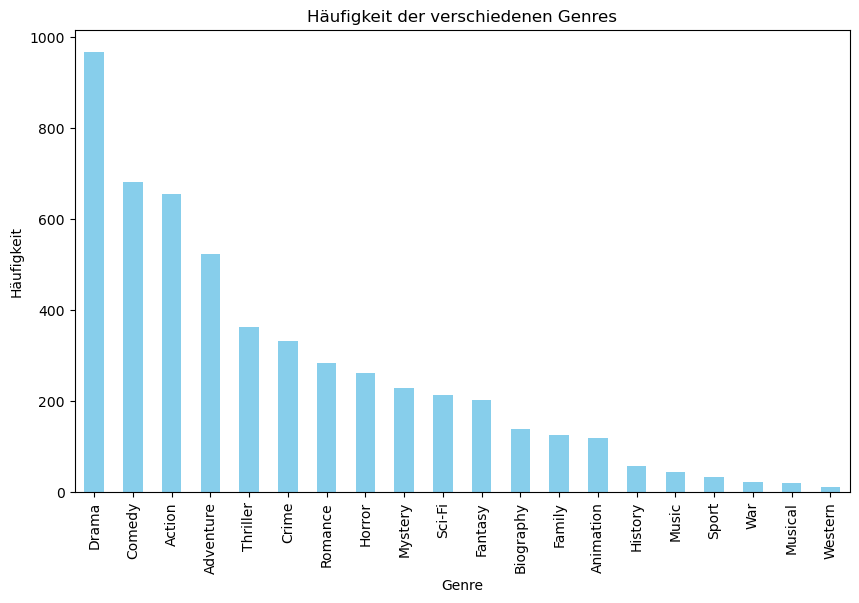

In [67]:
#Häufigkeit der verschiedenen Genres als Balkendiagramm darstellen 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Häufigkeit der verschiedenen Genres')
plt.xlabel('Genre')
plt.ylabel('Häufigkeit')
plt.show()

In [27]:
unique_genres = df['Genre'].str.split(', ').explode().unique()

print("Alle Genres:")
for genre in unique_genres:
    print(genre)


Alle Genres:
Action
Adventure
Fantasy
Animation
Drama
Family
Comedy
Thriller
Horror
Sci-Fi
History
Crime
Mystery
Romance
Musical
War
Biography
Music
Sport
Western


In [33]:
genre_ratings = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Genre mit dem höchsten Durchschnitt beim Rating auswählen
best_genre = genre_ratings.idxmax()
best_genre_rating = genre_ratings.max()

print(f"Das Genre mit dem höchsten Durchschnittsrating ist '{best_genre}' mit einem Rating von {best_genre_rating:.2f}")

Das Genre mit dem höchsten Durchschnittsrating ist 'Biography' mit einem Rating von 7.28


In [36]:
average_rating_drama = df[df['Genre'].str.contains('Drama')]['Rating'].mean()
print(f'Durchschnittliches Rating für das Genre Drama: {average_rating_drama}')


Durchschnittliches Rating für das Genre Drama: 6.925025853154085


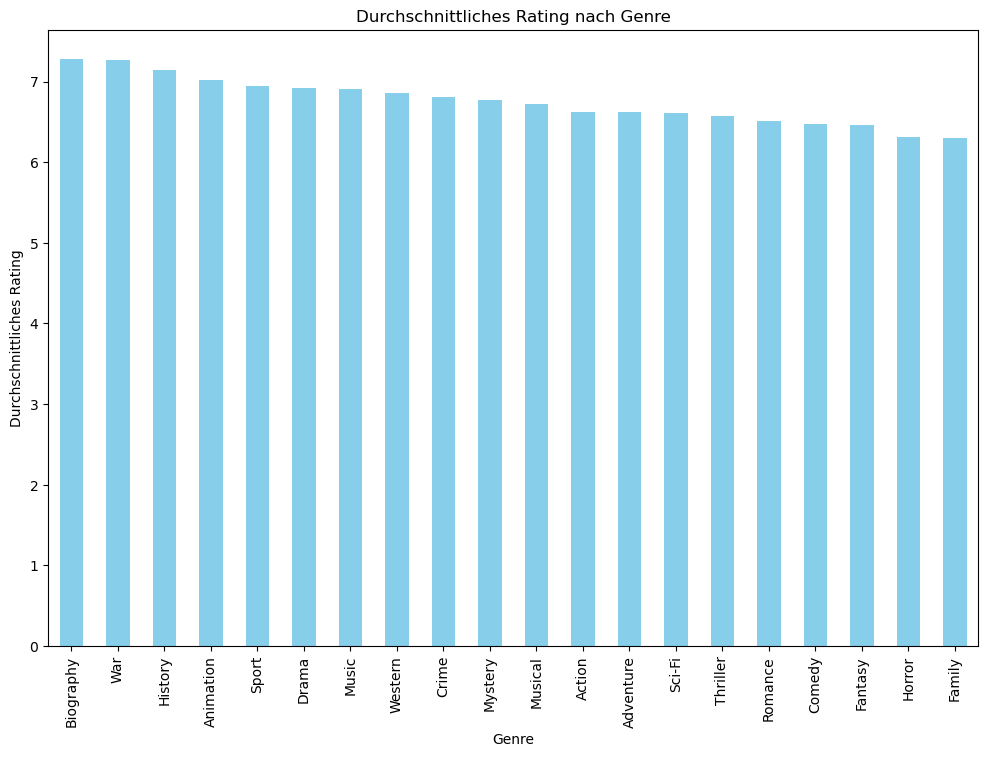

In [35]:
import pandas as pd

# Annahme: 'df' ist dein DataFrame
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # Konvertiere 'Rating' in numerischen Datentyp

# Gruppieren nach Genre und Berechnung des durchschnittlichen Ratings
genre_ratings = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Durchschnittliches Rating nach Genre')
plt.xlabel('Genre')
plt.ylabel('Durchschnittliches Rating')
plt.show()


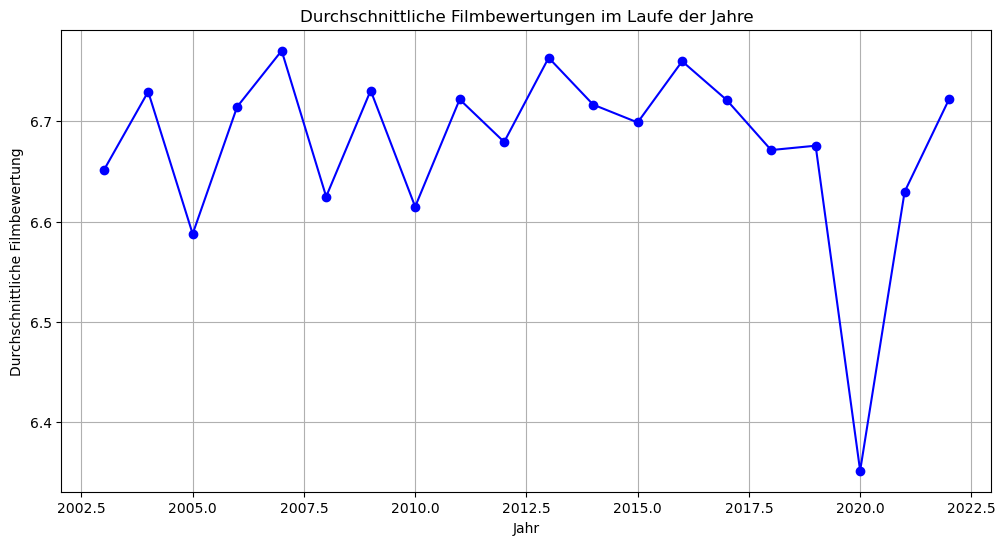

In [37]:
import matplotlib.pyplot as plt

# Annahme: 'df' ist dein DataFrame mit den Filmdaten
# Bitte die tatsächlichen Spaltennamen in deinem DataFrame verwenden

# Gruppiere den DataFrame nach dem Erscheinungsjahr und berechne den Durchschnitt der Filmbewertungen
average_ratings_by_year = df.groupby('Year')['Rating'].mean()

# Plot
plt.figure(figsize=(12, 6))
average_ratings_by_year.plot(marker='o', linestyle='-', color='b')
plt.title('Durchschnittliche Filmbewertungen im Laufe der Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Filmbewertung')
plt.grid(True)
plt.show()


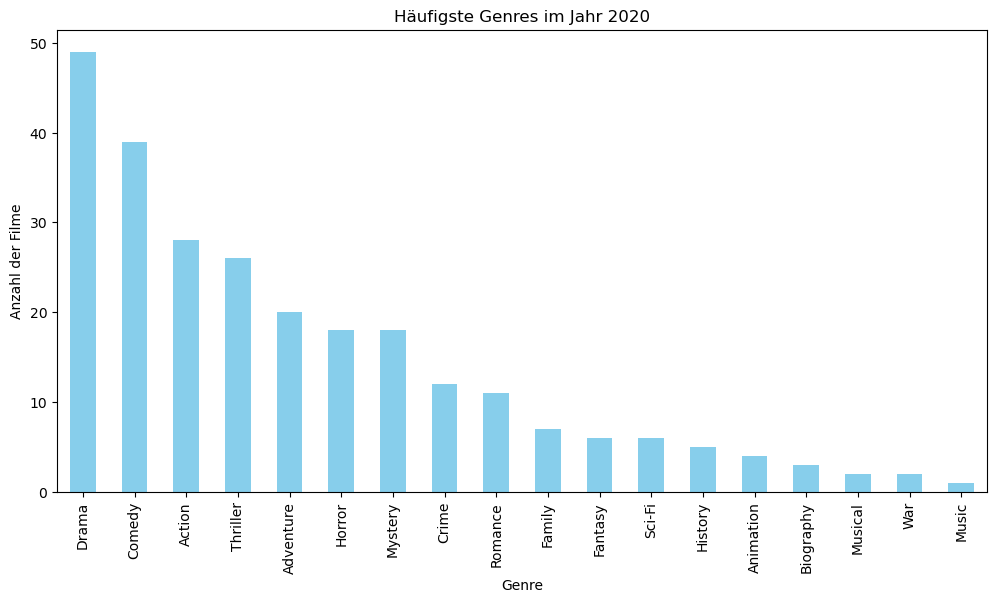

In [38]:
genres_2020 = df[df['Year'] == 2020]['Genre'].str.split(', ').explode()
top_genres_2020 = genres_2020.value_counts()

# Plot der häufigsten Genres im Jahr 2020
plt.figure(figsize=(12, 6))
top_genres_2020.plot(kind='bar', color='skyblue')
plt.title('Häufigste Genres im Jahr 2020')
plt.xlabel('Genre')
plt.ylabel('Anzahl der Filme')
plt.show()


In [40]:
low_rated_2020 = df[(df['Year'] == 2020) & (df['Rating'] < 5.0)]
print(low_rated_2020[['Title', 'Rating', 'Genre']])

              Title  Rating      Genre
200        365 Days     3.3      Drama
200        365 Days     3.3    Romance
234           Megan     4.2   Thriller
265  Fantasy Island     4.9    Fantasy
265  Fantasy Island     4.9     Horror
265  Fantasy Island     4.9    Mystery
282   Friendsgiving     4.4     Comedy
282   Friendsgiving     4.4      Drama
285    Horizon Line     4.8     Action
285    Horizon Line     4.8  Adventure
285    Horizon Line     4.8      Drama


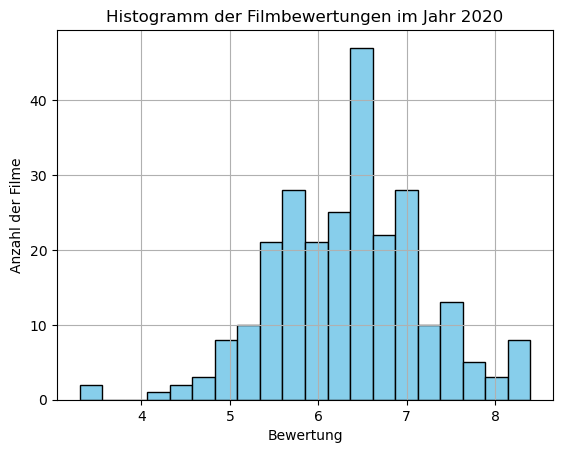

In [41]:
ratings_2020 = df[df['Year'] == 2020]['Rating']
ratings_2020.hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogramm der Filmbewertungen im Jahr 2020')
plt.xlabel('Bewertung')
plt.ylabel('Anzahl der Filme')
plt.show()

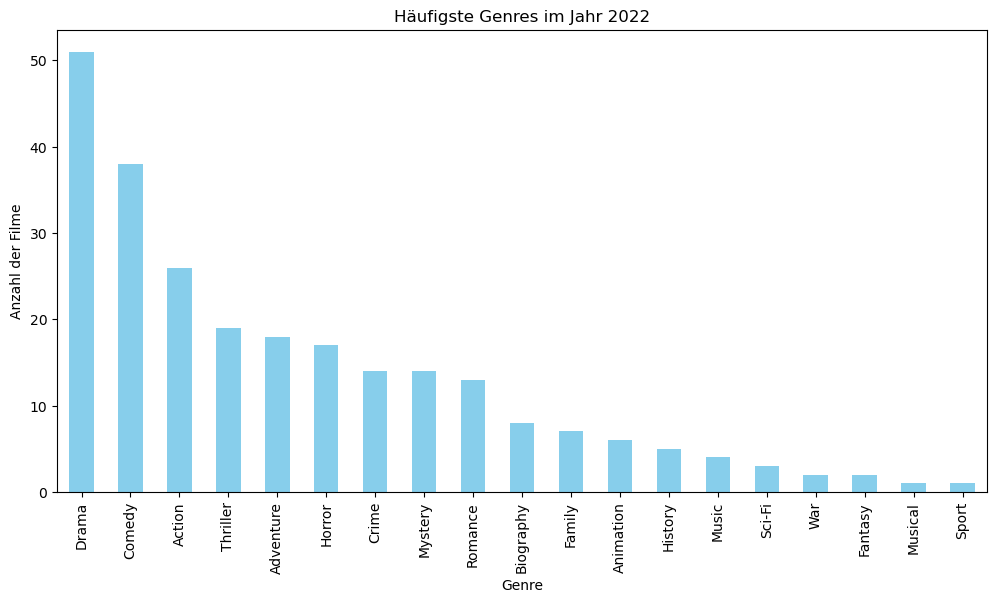

In [44]:
# 'df' = DataFrame
genres_2022 = df[df['Year'] == 2022]['Genre'].str.split(', ').explode()
top_genres_2022 = genres_2022.value_counts()

# Plot der häufigsten Genres im Jahr 2020
plt.figure(figsize=(12, 6))
top_genres_2022.plot(kind='bar', color='skyblue')
plt.title('Häufigste Genres im Jahr 2022')
plt.xlabel('Genre')
plt.ylabel('Anzahl der Filme')
plt.show()


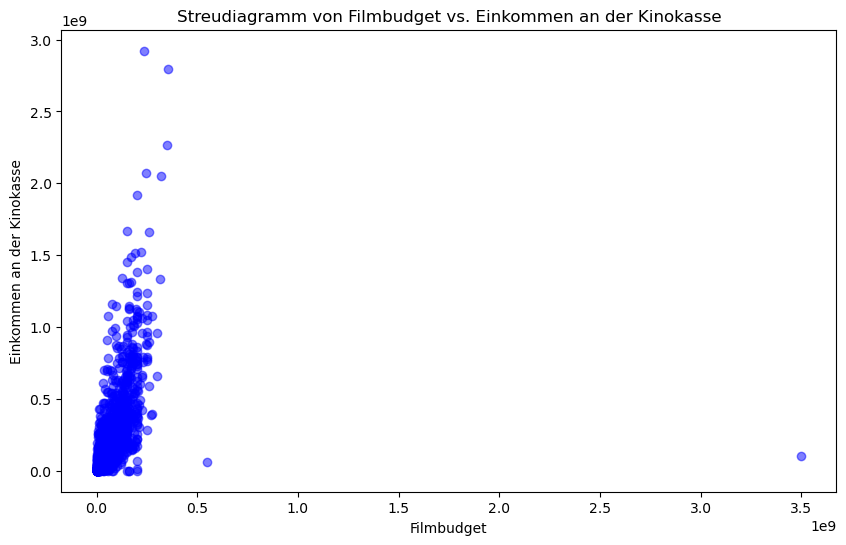

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 'movies.csv' ist der Name deiner Datei
df = pd.read_csv(r"C:\Users\monaa\Desktop\Seminare & Vorlesungen\Projektmanagement ILV\movies.csv")

# Bereinigung und Umwandlung der Budgetwerte
df['Budget'] = df['Budget'].replace('[\$,€,₹,SEK,CA]', '', regex=True).replace('Unknown', 'NaN', regex=True)
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')

# Bereinigung und Umwandlung der Einkommenswerte
df['Income'] = df['Income'].replace('[\$,€,₹,SEK,CA]', '', regex=True).replace('Unknown', 'NaN', regex=True)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Streudiagramm erstellen
plt.figure(figsize=(10, 6))
plt.scatter(df['Budget'], df['Income'], alpha=0.5, color='blue')
plt.title('Streudiagramm von Filmbudget vs. Einkommen an der Kinokasse')
plt.xlabel('Filmbudget')
plt.ylabel('Einkommen an der Kinokasse')
plt.show()

In [49]:
correlation_coefficient = df['Budget'].corr(df['Income'])
print(f"Pearson-Korrelationskoeffizient: {correlation_coefficient}")


Pearson-Korrelationskoeffizient: 0.41701207326490164


Korrelation zwischen Laufzeit und Bewertung: 0.38131891511592747


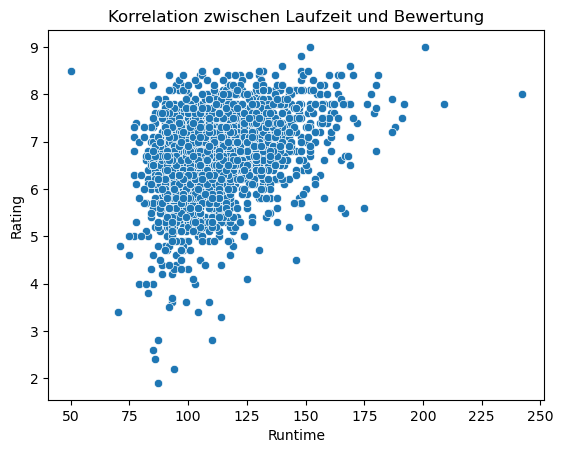

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Konvertiere die 'Runtime'-Spalte in numerische Werte (falls sie nicht bereits numerisch ist)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Prüfung ob dies erfolgreich war 
if pd.api.types.is_numeric_dtype(df['Runtime']):
    #Korrelation berechnen 
    runtime_rating_correlation = df['Runtime'].corr(df['Rating'])

    print(f"Korrelation zwischen Laufzeit und Bewertung: {runtime_rating_correlation}")

    #Visualisierung der Korrelation mit einem Streudiagramm
    sns.scatterplot(x='Runtime', y='Rating', data=df)
    plt.title('Korrelation zwischen Laufzeit und Bewertung')
    plt.show()

In [61]:
top_100_movies = df.nlargest(100, 'Rating')
print(top_100_movies)

                                              Title  Rating  Year     Month  \
1401                                The Dark Knight     9.0  2008      July   
1903  The Lord of the Rings: The Return of the King     9.0  2003  December   
1200                                      Inception     8.8  2010      July   
84                                       Drishyam 2     8.6  2022  November   
800                                    Interstellar     8.6  2014  November   
...                                             ...     ...   ...       ...   
501                               Blade Runner 2049     8.0  2017   October   
609                                      La La Land     8.0  2016  December   
611                                        Deadpool     8.0  2016  February   
618                                        Zootopia     8.0  2016     March   
633                             The Invisible Guest     8.0  2016   January   

     Certificate  Runtime                          

In [64]:
import pandas as pd

top_100_movies = df.nlargest(100, 'Rating')

# Auswahl der relevanten Spalten
selected_columns = ['Rating', 'Runtime', 'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income', 'Country_of_origin']

# Ausgabe der Top-100-Filme mit den ausgewählten Spalten
top_100_movies_selected = top_100_movies[selected_columns]
print(top_100_movies_selected)


      Rating  Runtime                             Directors  \
1401     9.0    152.0                     Christopher Nolan   
1903     9.0    201.0                         Peter Jackson   
1200     8.8    148.0                     Christopher Nolan   
84       8.6    140.0                       Abhishek Pathak   
800      8.6    169.0                     Christopher Nolan   
...      ...      ...                                   ...   
501      8.0    164.0                      Denis Villeneuve   
609      8.0    128.0                       Damien Chazelle   
611      8.0    108.0                            Tim Miller   
618      8.0    108.0  Byron Howard, Rich Moore, Jared Bush   
633      8.0    106.0                           Oriol Paulo   

                                                  Stars  \
1401  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
1903  Elijah Wood, Viggo Mortensen, Ian McKellen, Or...   
1200  Leonardo DiCaprio, Joseph Gordon Levitt, Ellio...   
84     

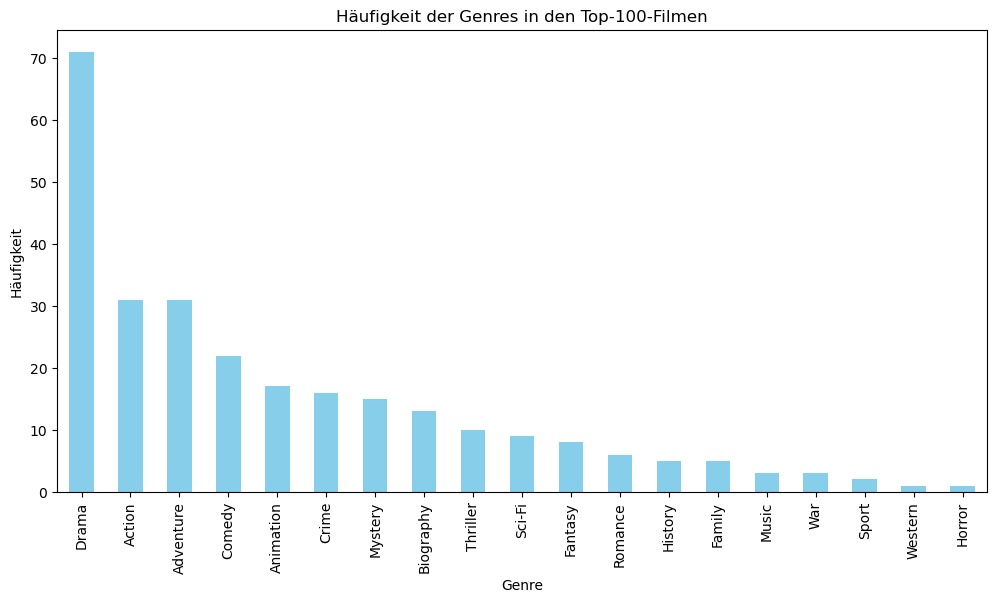

In [66]:
import matplotlib.pyplot as plt

genres_count = top_100_movies_selected['Genre'].str.split(', ').explode().value_counts()

# Plot
plt.figure(figsize=(12, 6))
genres_count.plot(kind='bar', color='skyblue')
plt.title('Häufigkeit der Genres in den Top-100-Filmen')
plt.xlabel('Genre')
plt.ylabel('Häufigkeit')
plt.show()